# Отток клиентов

***Описание проекта***

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

***Описание данных***

Признаки

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента

## Подготовка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
# Откроем файл и запишем датасет в переменную data
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('Churn.csv')

In [3]:
# Посмотрим первые 10 строк
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
# Выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


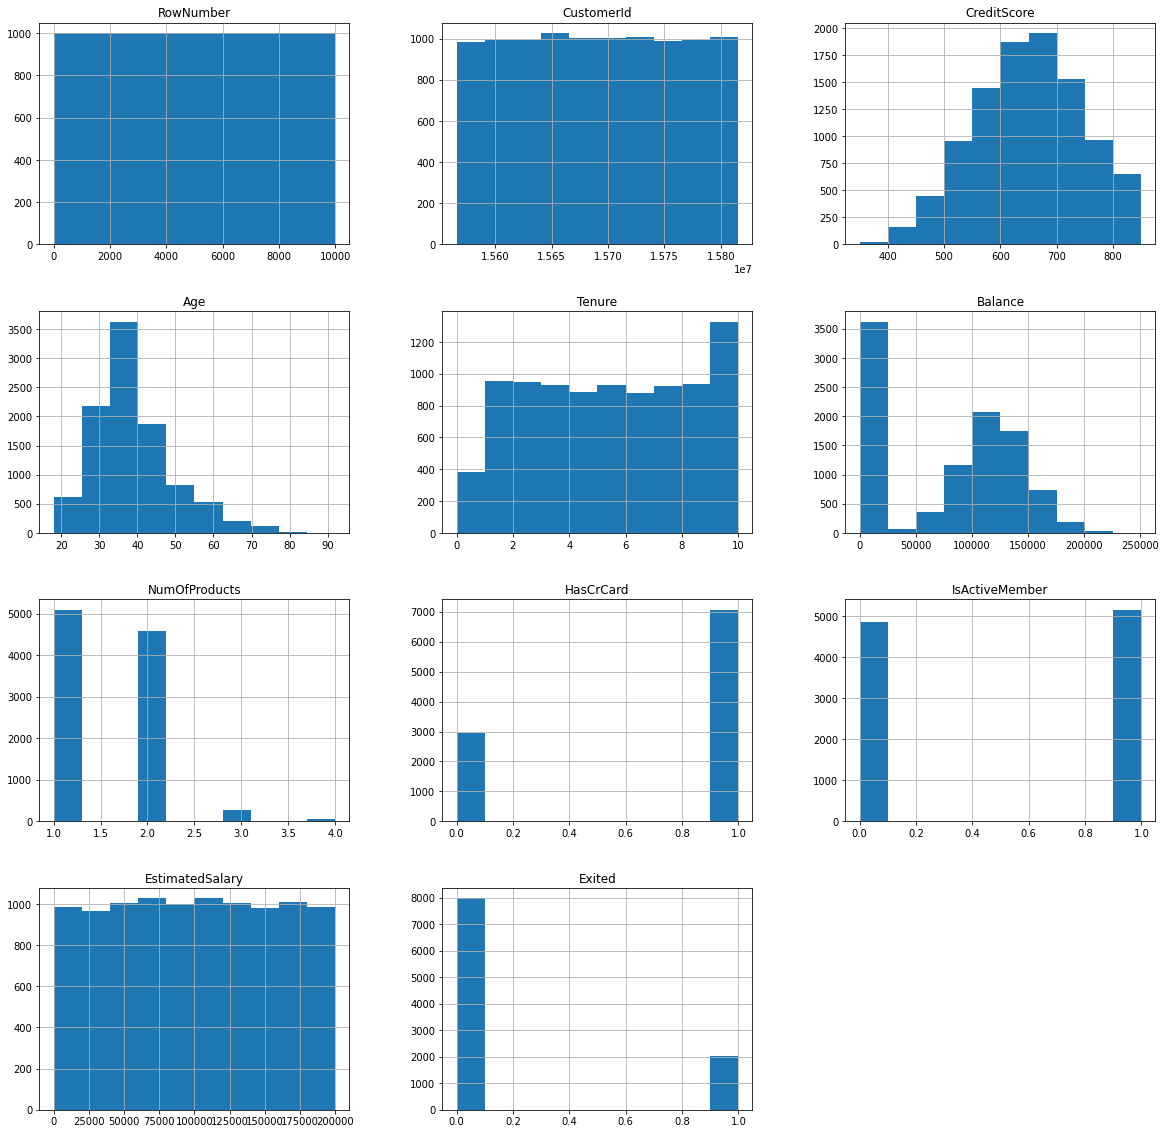

In [6]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(20, 20))
plt.show()

In [7]:
# Выведем количество пропущенных значений
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
# Переименуем столбцы
data = data.rename(columns={'RowNumber': 'row_number', 
                            'CustomerId': 'customer_id', 
                            'Surname': 'surname',
                            'CreditScore': 'credit_score',
                            'Geography': 'geography ',
                            'Gender': 'gender',
                            'Age': 'age',
                            'Tenure': 'tenure',
                            'Balance': 'balance',
                            'NumOfProducts': 'num_of_products',
                            'HasCrCard': 'has_cr_card',
                            'IsActiveMember': 'is_active_member',
                            'EstimatedSalary': 'estimated_salary',
                            'Exited': 'exited'
                            
                           })

# Проверим результат
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography ',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [9]:
# Заполним пропуски медианой
data['tenure'].fillna(data['tenure'].median(), inplace=True)

In [10]:
# Выведем количество пропущенных значений
data.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

***Вывод:*** Файл содержит 10000 записей. Количество значений в столбцах различается, что говорит о том, что есть пропущенные значения. Присутствуют некорректные наименования столбцов. Построена общая гистограмма для всех числовых столбцов таблицы. Выполнена предобработка данных: заполнены пропущенные знвачения, наименования столбцов изменены на корректные.


## Исследование задачи

In [11]:
# Удалим ненужные столбцы
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [12]:
# Проведем кодирование с помощью OHE
data = pd.get_dummies(data, drop_first=True)

In [13]:
# Выделим признаки
features = data.drop(['exited'], axis=1)
target = data['exited']

In [14]:
# Разделим датафрейм на обучающую, валидационную и тестовую выборку
features_train, features_x, target_train, target_y = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_x, target_y, test_size=0.5, random_state=12345)

In [15]:
# Посмотрим на размерность сформированных наборов данных
print('Размерность набора данных features_train: ', features_train.shape)
print('Размерность набора данных target_train: ', target_train.shape)
print('Размерность набора данных features_valid: ', features_valid.shape)
print('Размерность набора данных target_valid: ', target_valid.shape)
print('Размерность набора данных features_test: ', features_test.shape)
print('Размерность набора данных target_test: ', target_test.shape)

Размерность набора данных features_train:  (6000, 11)
Размерность набора данных target_train:  (6000,)
Размерность набора данных features_valid:  (2000, 11)
Размерность набора данных target_valid:  (2000,)
Размерность набора данных features_test:  (2000, 11)
Размерность набора данных target_test:  (2000,)


In [16]:
# Выполним масштабирование
pd.options.mode.chained_assignment = None
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography _Germany,geography _Spain,gender_Male
6113,-0.556029,-0.285890,-1.092943,-1.219673,2,0,1,0.437216,0,1,1
760,-0.514803,0.381372,-0.002786,0.921527,1,1,0,1.640143,0,0,0
1419,-1.184724,0.476696,-1.092943,0.608480,1,1,1,0.624456,0,0,0
9436,0.350941,-0.095244,-0.366172,-1.219673,3,1,0,-0.430962,0,0,1
6128,1.742315,-0.381213,-1.456328,-1.219673,2,0,1,-1.686346,0,0,1


Из датасета удалены ненужные столбцы, проведено кодирование с помощью OHE, выделены признаки. Датасет разделен на три выборки: обучающую, валидационную и тестовую. Выполнено масштабирование.


***Дерево решений***

In [17]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for max_depth in range(1,10):
    for min_samples_split in range(2,10):
        for min_samples_leaf in range(1,10):
            for criterion in ['gini', 'entropy']:
                
                # Подставим гиперпараметры в модель
                model_decision_tree = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      criterion=criterion)
                
                # Обучение на тренировочной выборке
                model_decision_tree.fit(features_train, target_train)
                
                # Поиск предсказаний на валидационной выборке
                predictions = model_decision_tree.predict(features_valid)
                
                # Вычисление точности модели
                accuracy = accuracy_score(target_valid, predictions)
                
                # Вычисление F1-меры модели
                f1 = f1_score(target_valid, predictions)
                
                # Вычисление AUC_ROC модели
                probabilities_valid = model_decision_tree.predict_proba(features_valid)
                probabilities_one_valid = probabilities_valid[:, 1]
                auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                
                # Сохранение лучших гиперпараметров
                if f1 > best_f1:
                    best_parametrs = [max_depth, min_samples_split, min_samples_leaf, criterion]
                    best_accuracy = accuracy
                    best_f1 = f1
                    best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3]
                            ))

Наилучшая точность: 0.867
F1-мера: 0.5856697819314641
AUC ROC: 0.8284005092836173
Параметры модели:
   max_depth = 6
   min_samples_split = 2
   min_samples_leaf = 6
   criterion = entropy 


***Случайный лес***

In [18]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for n_estimators in (1,10):
    for max_depth in range(1,10):
        for min_samples_split in range(2,10):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    
                    # Подставим гиперпараметры в модель
                    model_random_forest = RandomForestClassifier(random_state=12345,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion)
                    
                    # Обучение на тренировочной выборке
                    model_random_forest.fit(features_train, target_train)
                    
                    # Поиск предсказаний на валидационной выборке
                    predictions = model_random_forest.predict(features_valid)
                    
                    # Вычисление точности модели
                    accuracy = accuracy_score(target_valid, predictions)
                    
                    # Вычисление F1-меры модели
                    f1 = f1_score(target_valid, predictions)
                    
                    # Вычисление AUC_ROC модели
                    probabilities_valid = model_random_forest.predict_proba(features_valid)
                    probabilities_one_valid = probabilities_valid[:, 1]
                    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                    
                    # Сохранение лучших гиперпараметров
                    if f1 > best_f1:
                        best_parametrs = [n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_accuracy = accuracy
                        best_f1 = f1
                        best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   n_estimators = {}
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3],
                             best_parametrs[4]
                            ))                       

Наилучшая точность: 0.8695
F1-мера: 0.5837320574162679
AUC ROC: 0.8533131251798151
Параметры модели:
   n_estimators = 10
   max_depth = 8
   min_samples_split = 2
   min_samples_leaf = 3
   criterion = entropy 


***Логистическая регрессия***

In [19]:
# Подставим гиперпараметры в модель
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

# Обучение на тренировочной выборке
model_logistic_regression.fit(features_train, target_train)

# Поиск предсказаний на валидационной выборке
predictions = model_logistic_regression.predict(features_valid)

# Вычисление метрики модели    
result = model_logistic_regression.score(features_valid, target_valid)

# Вычисление F1-меры модели
f1 = f1_score(target_valid, predictions)

# Вычисление AUC_ROC модели
probabilities_valid = model_logistic_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

# Вывод
print('Наилучшая точность:', result)
print('F1-мера:', f1)
print('AUC ROC:', auc_roc)

Наилучшая точность: 0.8155
F1-мера: 0.3050847457627119
AUC ROC: 0.7703137244305132


In [20]:
# Посмотрим количество объектов отрицательного и положительно класса
features[target == 0].shape, features[target == 1].shape

((7963, 11), (2037, 11))

***Вывод:*** Построено три модели: дерево решений, случайный лес и логистическая регрессия. Дисбаланс классов сказывается на качестве моделей, больше всего от дисбаланса страдает модель логической регрессии.

## Борьба с дисбалансом

Для борьбы с дисбалансом будем использовать три метода - взвешивание класов, уменьшение и увеличение выборки. С помощью F1 меры выберем лучший метод.

***Class weight***

*Дерево решений*

In [21]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for max_depth in range(1,10):
    for min_samples_split in range(2,10):
        for min_samples_leaf in range(1,10):
            for criterion in ['gini', 'entropy']:
                
                # Подставим гиперпараметры в модель
                model_decision_tree = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      criterion=criterion,
                                                      class_weight='balanced')
                
                # Обучение на тренировочной выборке
                model_decision_tree.fit(features_train, target_train)
                
                # Поиск предсказаний на валидационной выборке
                predictions = model_decision_tree.predict(features_valid)
                
                # Вычисление точности модели
                accuracy = accuracy_score(target_valid, predictions)
                
                # Вычисление F1-меры модели
                f1 = f1_score(target_valid, predictions)
                
                # Вычисление AUC_ROC модели
                probabilities_valid = model_decision_tree.predict_proba(features_valid)
                probabilities_one_valid = probabilities_valid[:, 1]
                auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                
                # Сохранение лучших гиперпараметров
                if f1 > best_f1:
                    best_parametrs = [max_depth, min_samples_split, min_samples_leaf, criterion]
                    best_accuracy = accuracy
                    best_f1 = f1
                    best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3]
                            ))

Наилучшая точность: 0.8015
F1-мера: 0.5717367853290184
AUC ROC: 0.8151232119837424
Параметры модели:
   max_depth = 8
   min_samples_split = 2
   min_samples_leaf = 8
   criterion = entropy 


*Случайный лес*

In [22]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for n_estimators in (1,10):
    for max_depth in range(1,10):
        for min_samples_split in range(2,10):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    
                    # Подставим гиперпараметры в модель
                    model_random_forest = RandomForestClassifier(random_state=12345,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion,
                                                          class_weight='balanced')
                    
                    # Обучение на тренировочной выборке
                    model_random_forest.fit(features_train, target_train)
                    
                    # Поиск предсказаний на валидационной выборке
                    predictions = model_random_forest.predict(features_valid)
                    
                    # Вычисление точности модели
                    accuracy = accuracy_score(target_valid, predictions)
                    
                    # Вычисление F1-меры модели
                    f1 = f1_score(target_valid, predictions)
                    
                    # Вычисление AUC_ROC модели
                    probabilities_valid = model_random_forest.predict_proba(features_valid)
                    probabilities_one_valid = probabilities_valid[:, 1]
                    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                    
                    # Сохранение лучших гиперпараметров
                    if f1 > best_f1:
                        best_parametrs = [n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_accuracy = accuracy
                        best_f1 = f1
                        best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   n_estimators = {}
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3],
                             best_parametrs[4]
                            ))                       

Наилучшая точность: 0.828
F1-мера: 0.6169265033407573
AUC ROC: 0.8514708664020638
Параметры модели:
   n_estimators = 10
   max_depth = 8
   min_samples_split = 7
   min_samples_leaf = 3
   criterion = entropy 


*Логистическая регрессия*

In [23]:
# Подставим гиперпараметры в модель
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')

# Обучение на тренировочной выборке
model_logistic_regression.fit(features_train, target_train)

# Поиск предсказаний на валидационной выборке
predictions = model_logistic_regression.predict(features_valid)

# Вычисление метрики модели    
result = model_logistic_regression.score(features_valid, target_valid)

# Вычисление F1-меры модели
f1 = f1_score(target_valid, predictions)

# Вычисление AUC_ROC модели
probabilities_valid = model_logistic_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

# Вывод
print('Наилучшая точность:', result)
print('F1-мера:', f1)
print('AUC ROC:', auc_roc)

Наилучшая точность: 0.7185
F1-мера: 0.49687220732797144
AUC ROC: 0.775363643444245


***Увеличение выборки***

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [25]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

*Дерево решений*

In [26]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for max_depth in range(1,10):
    for min_samples_split in range(2,10):
        for min_samples_leaf in range(1,10):
            for criterion in ['gini', 'entropy']:
                
                # Подставим гиперпараметры в модель
                model_decision_tree = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      criterion=criterion)
                
                # Обучение на тренировочной выборке
                model_decision_tree.fit(features_upsampled, target_upsampled)
                
                # Поиск предсказаний на валидационной выборке
                predictions = model_decision_tree.predict(features_valid)
                
                # Вычисление точности модели
                accuracy = accuracy_score(target_valid, predictions)
                
                # Вычисление F1-меры модели
                f1 = f1_score(target_valid, predictions)
                
                # Вычисление AUC_ROC модели
                probabilities_valid = model_decision_tree.predict_proba(features_valid)
                probabilities_one_valid = probabilities_valid[:, 1]
                auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                
                # Сохранение лучших гиперпараметров
                if f1 > best_f1:
                    best_parametrs = [max_depth, min_samples_split, min_samples_leaf, criterion]
                    best_accuracy = accuracy
                    best_f1 = f1
                    best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3]
                            ))

Наилучшая точность: 0.779
F1-мера: 0.5526315789473684
AUC ROC: 0.7918303214495191
Параметры модели:
   max_depth = 8
   min_samples_split = 2
   min_samples_leaf = 3
   criterion = entropy 


*Случайный лес*

In [27]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for n_estimators in (1,10):
    for max_depth in range(1,10):
        for min_samples_split in range(2,10):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    
                    # Подставим гиперпараметры в модель
                    model_random_forest = RandomForestClassifier(random_state=12345,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion)
                    
                    # Обучение на тренировочной выборке
                    model_random_forest.fit(features_upsampled, target_upsampled)
                    
                    # Поиск предсказаний на валидационной выборке
                    predictions = model_random_forest.predict(features_valid)
                    
                    # Вычисление точности модели
                    accuracy = accuracy_score(target_valid, predictions)
                    
                    # Вычисление F1-меры модели
                    f1 = f1_score(target_valid, predictions)
                    
                    # Вычисление AUC_ROC модели
                    probabilities_valid = model_random_forest.predict_proba(features_valid)
                    probabilities_one_valid = probabilities_valid[:, 1]
                    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                    
                    # Сохранение лучших гиперпараметров
                    if f1 > best_f1:
                        best_parametrs = [n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_accuracy = accuracy
                        best_f1 = f1
                        best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   n_estimators = {}
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3],
                             best_parametrs[4]
                            ))                       

Наилучшая точность: 0.8235
F1-мера: 0.6133625410733844
AUC ROC: 0.8527265906768036
Параметры модели:
   n_estimators = 10
   max_depth = 9
   min_samples_split = 8
   min_samples_leaf = 2
   criterion = gini 


*Логистическая регрессия*

In [28]:
# Подставим гиперпараметры в модель
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

# Обучение на тренировочной выборке
model_logistic_regression.fit(features_upsampled, target_upsampled)

# Поиск предсказаний на валидационной выборке
predictions = model_logistic_regression.predict(features_valid)

# Вычисление метрики модели    
result = model_logistic_regression.score(features_valid, target_valid)

# Вычисление F1-меры модели
f1 = f1_score(target_valid, predictions)

# Вычисление AUC_ROC модели
probabilities_valid = model_logistic_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

# Вывод
print('Наилучшая точность:', result)
print('F1-мера:', f1)
print('AUC ROC:', auc_roc)

Наилучшая точность: 0.7135
F1-мера: 0.496042216358839
AUC ROC: 0.7753731805906354


***Уменьшение выборки***

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [30]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

*Дерево решений*

In [31]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for max_depth in range(1,10):
    for min_samples_split in range(2,10):
        for min_samples_leaf in range(1,10):
            for criterion in ['gini', 'entropy']:
                
                # Подставим гиперпараметры в модель
                model_decision_tree = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      criterion=criterion)
                
                # Обучение на тренировочной выборке
                model_decision_tree.fit(features_downsampled, target_downsampled)
                
                # Поиск предсказаний на валидационной выборке
                predictions = model_decision_tree.predict(features_valid)
                
                # Вычисление точности модели
                accuracy = accuracy_score(target_valid, predictions)
                
                # Вычисление F1-меры модели
                f1 = f1_score(target_valid, predictions)
                
                # Вычисление AUC_ROC модели
                probabilities_valid = model_decision_tree.predict_proba(features_valid)
                probabilities_one_valid = probabilities_valid[:, 1]
                auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                
                # Сохранение лучших гиперпараметров
                if f1 > best_f1:
                    best_parametrs = [max_depth, min_samples_split, min_samples_leaf, criterion]
                    best_accuracy = accuracy
                    best_f1 = f1
                    best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3]
                            ))

Наилучшая точность: 0.77
F1-мера: 0.5568400770712909
AUC ROC: 0.8273339384122876
Параметры модели:
   max_depth = 6
   min_samples_split = 9
   min_samples_leaf = 3
   criterion = gini 


*Случайный лес*

In [32]:
# Создадим переменные для лучших гиперпараметров
best_parametrs = []
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0

# В цикле последовательно меняем гиперпараметры
for n_estimators in (1,10):
    for max_depth in range(1,10):
        for min_samples_split in range(2,10):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    
                    # Подставим гиперпараметры в модель
                    model_random_forest = RandomForestClassifier(random_state=12345,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion)
                    
                    # Обучение на тренировочной выборке
                    model_random_forest.fit(features_downsampled, target_downsampled)
                    
                    # Поиск предсказаний на валидационной выборке
                    predictions = model_random_forest.predict(features_valid)
                    
                    # Вычисление точности модели
                    accuracy = accuracy_score(target_valid, predictions)
                    
                    # Вычисление F1-меры модели
                    f1 = f1_score(target_valid, predictions)
                    
                    # Вычисление AUC_ROC модели
                    probabilities_valid = model_random_forest.predict_proba(features_valid)
                    probabilities_one_valid = probabilities_valid[:, 1]
                    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                    
                    # Сохранение лучших гиперпараметров
                    if f1 > best_f1:
                        best_parametrs = [n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_accuracy = accuracy
                        best_f1 = f1
                        best_auc_roc = auc_roc

# вывод лучших параметров
print('''Наилучшая точность: {}
F1-мера: {}
AUC ROC: {}
Параметры модели:
   n_estimators = {}
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(best_accuracy,
                             best_f1,
                             best_auc_roc,
                             best_parametrs[0],
                             best_parametrs[1],
                             best_parametrs[2],
                             best_parametrs[3],
                             best_parametrs[4]
                            ))                       

Наилучшая точность: 0.791
F1-мера: 0.5957446808510638
AUC ROC: 0.8475813001991674
Параметры модели:
   n_estimators = 10
   max_depth = 7
   min_samples_split = 4
   min_samples_leaf = 1
   criterion = gini 


*Логистическая регрессия*

In [33]:
# Подставим гиперпараметры в модель
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

# Обучение на тренировочной выборке
model_logistic_regression.fit(features_downsampled, target_downsampled)

# Поиск предсказаний на валидационной выборке
predictions = model_logistic_regression.predict(features_valid)

# Вычисление метрики модели    
result = model_logistic_regression.score(features_valid, target_valid)

# Вычисление F1-меры модели
f1 = f1_score(target_valid, predictions)

# Вычисление AUC_ROC модели
probabilities_valid = model_logistic_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

# Вывод
print('Наилучшая точность:', result)
print('F1-мера:', f1)
print('AUC ROC:', auc_roc)

Наилучшая точность: 0.707
F1-мера: 0.49043478260869566
AUC ROC: 0.7723658004288537


***Вывод:*** Для борьбы с дисбалансом было использовано три метода - взвешивание класов, уменьшение и увеличение выборки. Эти методы были применены к моделям: дерево решений, случайный лес и логистическая регрессия. По наибольшему значению F1 меры 0.6169265033407573 делаем вывод, что лучший метод - взвешивание класов для модели случайный лес. Наилучшие гиперпараметры модели: 
* n_estimators = 10
* max_depth = 8
* min_samples_split = 7
* min_samples_leaf = 3
* criterion = entropy

## Тестирование модели

Проверим выбранную модель на тестовой выборке, используя наилучшие гиперпараметры

In [34]:
# Подставим гиперпараметры в модель
model_random_forest = RandomForestClassifier(random_state=12345,
                                            n_estimators=10,
                                            max_depth=9,
                                            min_samples_split=8,
                                            min_samples_leaf=2,
                                            criterion='gini',
                                            class_weight='balanced')
                    
# Обучение на тренировочной выборке
model_random_forest.fit(features_train, target_train)
                    
# Поиск предсказаний на тестовой выборке
predictions = model_random_forest.predict(features_test)
                    
# Вычисление точности модели
accuracy = accuracy_score(target_test, predictions)
                    
# Вычисление F1-меры модели
f1 = f1_score(target_test, predictions)
                    
# Вычисление AUC_ROC модели
probabilities_test = model_random_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# Вывод
print('Наилучшая точность:', accuracy)
print('F1-мера:', f1)
print('AUC ROC:', auc_roc)

Наилучшая точность: 0.832
F1-мера: 0.6339869281045751
AUC ROC: 0.8591744684417202


***Вывод:*** Модель случайный лес с использованием метода взвешивания классов проверена на тестовой выборке. Удалось достичь F1-меры не менее 0.59.

* F1-мера: 0.6339869281045751
* AUC ROC: 0.8591744684417202